In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib

In [2]:
# import os
# import time

In [3]:
df = pd.read_csv('AirPassengers.csv', index_col = "Month")
df = df[['#Passengers']].copy()
df.columns = ['close']
df = df[df['close'] != '.']
df = df.astype(float)

In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.close.dropna())
#result = adfuller(df)
print(f"p-value: {result[1]}")

p-value: 0.991880243437641


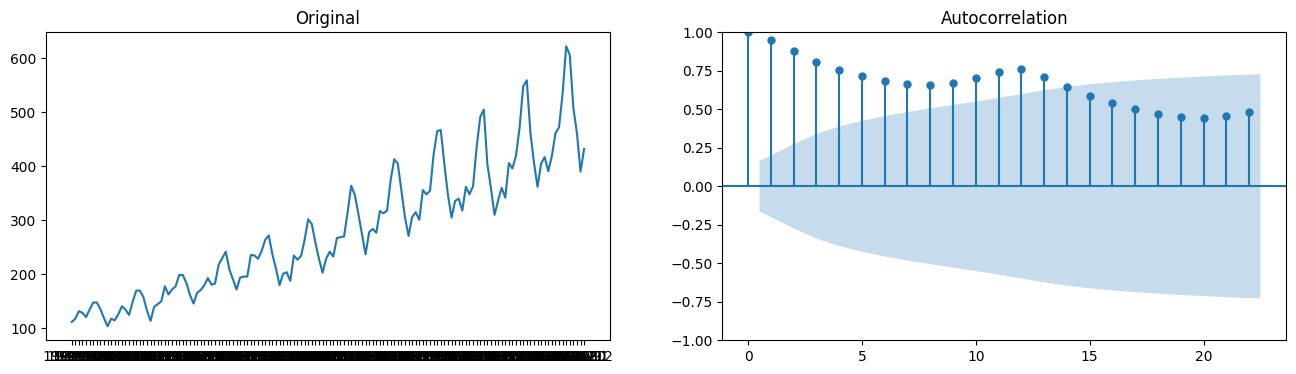

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(df.close)
ax1.set_title("Original")
plot_acf(df.close, ax=ax2);

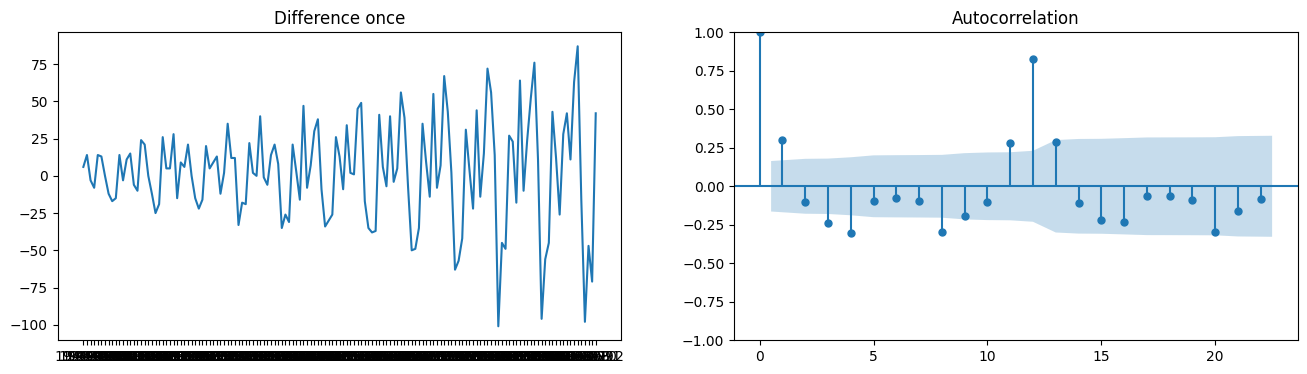

In [6]:
diff = df.close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

In [7]:
# diff once is good here (comment bc of lag)

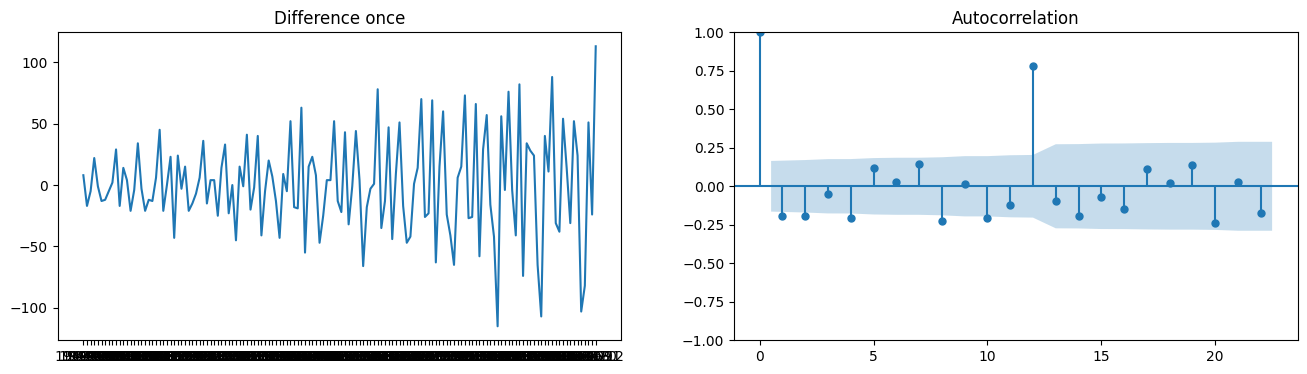

In [8]:
diff = df.close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

In [9]:
# pmdarima won't install...

# from pmdarima.arima.utils import ndiffs

# # ndiffs(df.close, test='adf')
# print(f"Number of differencing required: {ndiffs(df.close, test='adf')}")

In [10]:
# p (AR):

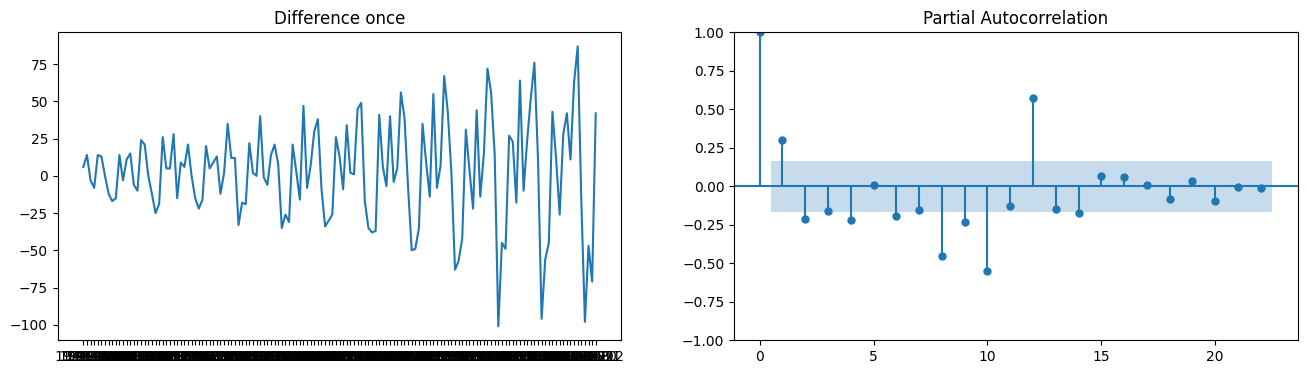

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = df.close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

In [12]:
# p 5 is good

In [13]:
# q (MA):

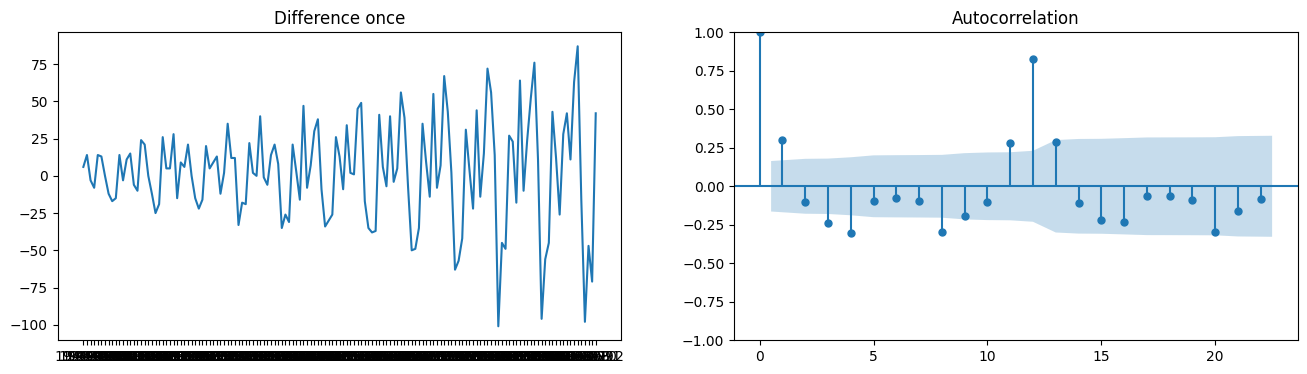

In [14]:
diff = df.close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [15]:
# q 5 or 0 is good

In [16]:
# from statsmodels.tsa.arima.model import ARIMA

# model = ARIMA(df.close, order=(5, 1, 5))  # Adjust (p, d, q) based on data
# result = model.fit()

In [17]:
prediction_days = 12

train = df.iloc[:-prediction_days]
test = df.iloc[-prediction_days:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(train, order=(5, 2, 4))  # Adjust (p, d, q) based on data
arima_result = arima_model.fit()

c:\Users\Sebastian\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sebastian\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sebastian\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sebastian\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramet

In [26]:
# "Maximum Likelihood optimization failed to converge"

# This message suggests that the optimizer is having a hard time determining good values for all of the parameters.
# There are a number of possible reasons why this could happen, but one reason is if the model is not a good fit for your data.
# For example, the local linear trend model assumes a trending series.
# If that’s not a good description of your data, it may have a hard time finding a good value for the associated variance parameter.
# That’s just one example of something that might be happening.

In [32]:
arima_forecast = arima_result.forecast(steps=prediction_days)
arima_forecast.index = test.index

In [33]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

arima_rmse = sqrt(mean_squared_error(test['close'], arima_forecast))
print(f'ARIMA RMSE: {arima_rmse}')

ARIMA RMSE: 3573965.6093246224


In [34]:
arima_prediction = pd.DataFrame(data = {'Price': arima_forecast}, index = (df.index[-prediction_days:]))

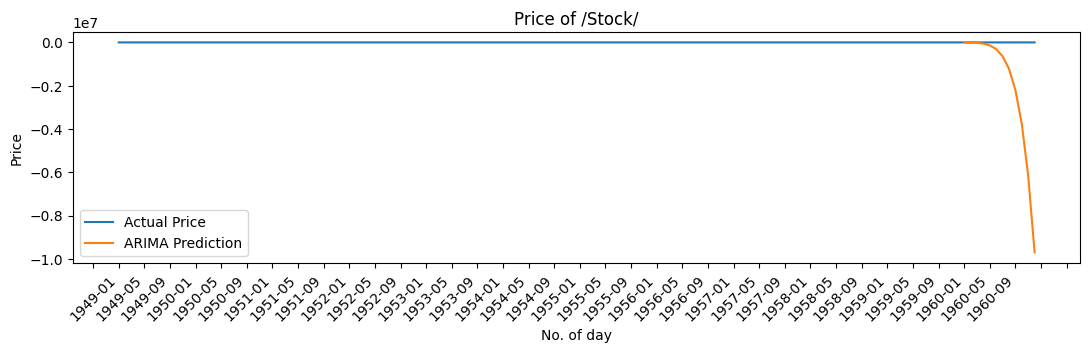

In [35]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (13, 3))
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=50))

plt.title('Price of /Stock/')
plt.xlabel('No. of day')
plt.ylabel('Price')


plt.plot(df, label='Actual Price')
plt.plot(arima_prediction, label='ARIMA Prediction')
# plt.plot(sgd_predicted, label='SGD predicted price')
plt.legend()
plt.show()

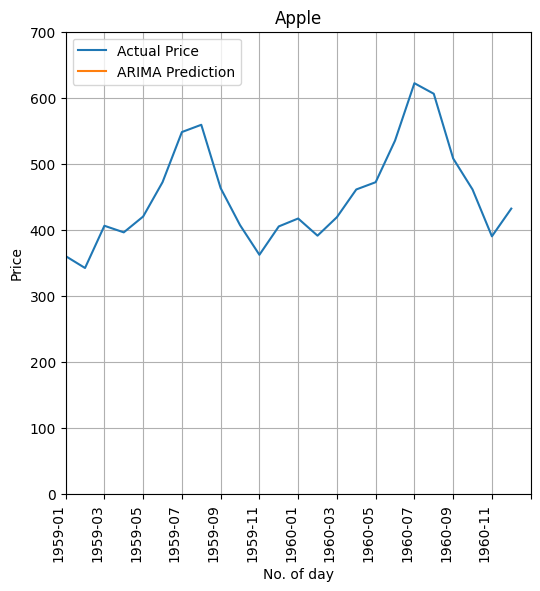

In [24]:
plt.figure(figsize = (6, 6))
plt.xticks(rotation=90, ha='right')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=14))

plt.title('Apple')
plt.xlabel('No. of day')
plt.ylabel('Price')


plt.plot(df[['close']], label='Actual Price')
plt.plot(arima_prediction, label='ARIMA Prediction')
# plt.plot(sgd_predicted, label='SGD predicted price')
plt.legend()

plt.axis([df[df.columns[0]].count()-prediction_days*2, df[df.columns[0]].count(), 0, 700])
plt.grid()

plt.show()